In [118]:
#The purpose of this file is to look at during what season (on average) a certain crime tends to peak in activity (in a certain county)
#I'll then go and apply some k means to it or something to try and find common structure
# we can still use k means clustering to find common patterns in qualitative data as long as i encode the data first
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns


[notice] A new release of pip is available: 26.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
main_df = pd.read_csv('CJQ06.20260202004354.csv')
print(main_df)
main_df = main_df.drop(["STATISTIC","C02480V03003","C02481V03160","TLIST(Q1)","UNIT"],axis=1)
pattern = r'\((\d{2})\)'
main_df = main_df.groupby(
    ["Quarter", "Garda Division", "Type of Offence"],  
    as_index=False  
)["VALUE"].sum()
main_df = main_df.loc[main_df["Type of Offence"].str.contains(pattern, regex=True)]




       STATISTIC           Statistic Label  TLIST(Q1) Quarter  C02481V03160  \
0          CJQ06  Recorded crime incidents      20031  2003Q1            11   
1          CJQ06  Recorded crime incidents      20031  2003Q1            11   
2          CJQ06  Recorded crime incidents      20031  2003Q1            11   
3          CJQ06  Recorded crime incidents      20031  2003Q1            11   
4          CJQ06  Recorded crime incidents      20031  2003Q1            11   
...          ...                       ...        ...     ...           ...   
216575     CJQ06  Recorded crime incidents      20253  2025Q3            66   
216576     CJQ06  Recorded crime incidents      20253  2025Q3            66   
216577     CJQ06  Recorded crime incidents      20253  2025Q3            66   
216578     CJQ06  Recorded crime incidents      20253  2025Q3            66   
216579     CJQ06  Recorded crime incidents      20253  2025Q3            66   

                       Garda Division C02480V03003 

C:\Users\downe\AppData\Local\Temp\ipykernel_8824\330188840.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  main_df = main_df.loc[main_df["Type of Offence"].str.contains(pattern, regex=True)]


In [104]:
main_df

,Quarter,Garda Division,Type of Offence,VALUE
5,2003Q1,Cavan/Monaghan Garda Division,"Attempts/threats to murder, assaults, harassme...",128.0
8,2003Q1,Cavan/Monaghan Garda Division,Burglary and related offences (07),136.0
10,2003Q1,Cavan/Monaghan Garda Division,Controlled drug offences (10),26.0
13,2003Q1,Cavan/Monaghan Garda Division,Damage to property and to the environment off...,145.0
16,2003Q1,Cavan/Monaghan Garda Division,Dangerous or negligent acts (04),160.0
...,...,...,...,...
216561,2025Q3,Wicklow Garda Division,Road and traffic offences (14),184.0
216567,2025Q3,Wicklow Garda Division,"Robbery, extortion and hijacking offences (06)",7.0
216568,2025Q3,Wicklow Garda Division,Sexual offences (02),18.0
216571,2025Q3,Wicklow Garda Division,Theft and related offences (08),465.0


In [105]:
main_df["Type of Offence"] = main_df["Type of Offence"].str.replace(r"\s\(\d{2}\)$", "", regex=True)
crimes = main_df["Type of Offence"].unique()


In [106]:
unique_division = main_df['Garda Division'].unique().tolist()
#replacing "/" with "-" to make writing filepaths easier
unique_division = [div.replace('/', '-') for div in unique_division]
main_df['Garda Division'] = main_df['Garda Division'].str.replace('/', '-')
main_df.to_csv("cleaned_quarters_df.csv",index=False)

In [107]:
main_df

,Quarter,Garda Division,Type of Offence,VALUE
5,2003Q1,Cavan-Monaghan Garda Division,"Attempts/threats to murder, assaults, harassme...",128.0
8,2003Q1,Cavan-Monaghan Garda Division,Burglary and related offences,136.0
10,2003Q1,Cavan-Monaghan Garda Division,Controlled drug offences,26.0
13,2003Q1,Cavan-Monaghan Garda Division,Damage to property and to the environment off...,145.0
16,2003Q1,Cavan-Monaghan Garda Division,Dangerous or negligent acts,160.0
...,...,...,...,...
216561,2025Q3,Wicklow Garda Division,Road and traffic offences,184.0
216567,2025Q3,Wicklow Garda Division,"Robbery, extortion and hijacking offences",7.0
216568,2025Q3,Wicklow Garda Division,Sexual offences,18.0
216571,2025Q3,Wicklow Garda Division,Theft and related offences,465.0


In [108]:
sub_dfs = {} # key = garda division, value = dataframe
for division in unique_division:
    sub_df = main_df.loc[main_df["Garda Division"]==division]
    sub_dfs[division] = sub_df

In [109]:
#writing each sub_df to its own individual csv file for future reference and ease
curr_dir = os.getcwd()
if not os.path.exists(os.path.join(curr_dir,"counties")):
    os.mkdir(os.path.join(curr_dir,"counties"),mode=0o755)

for division in sub_dfs.keys():
    division_path = os.path.join(curr_dir, "counties", division)
    os.makedirs(division_path, exist_ok=True)

    file_path = os.path.join(division_path, f"{division}_quarters_crime.csv")
    sub_dfs[division].to_csv(file_path, index=False)

In [110]:
crimes = {   'Attempts/threats to murder, assaults, harassments and related offences' : [0,0,0,0],
                                             'Burglary and related offences': [0,0,0,0],
                                                  'Controlled drug offences': [0,0,0,0],
                       'Damage to property and to the environment  offences': [0,0,0,0],
                                               'Dangerous or negligent acts': [0,0,0,0],
                                     'Fraud, deception and related offences': [0,0,0,0],
                                               'Homicide & related offences': [0,0,0,0],
                                           'Kidnapping and related offences': [0,0,0,0],
 'Offences against government, justice procedures and organisation of crime': [0,0,0,0],
                                         'Offences not elsewhere classified': [0,0,0,0],
                               'Public order and other social code offences': [0,0,0,0],
                                                 'Road and traffic offences': [0,0,0,0],
                                 'Robbery, extortion and hijacking offences': [0,0,0,0],
                                                           'Sexual offences': [0,0,0,0],
                                                'Theft and related offences': [0,0,0,0],
                                           'Weapons and explosives offences': [0,0,0,0]}


In [111]:
#key = county ; value = a key to a crime ; value of crime = list e.g.  [4,5,3,2] , 4 peaks in Q1, 5 peaks in Q2, 3 peaks in Q3, 2 peaks in q4
dfs = []
crime_dict = {}
for file in os.listdir("counties"):
    dfs.append(pd.read_csv(os.path.join(f"counties\\{file}",f"{file}_quarters_crime.csv")))

for file in os.listdir("counties"):
    crime_dict[file] = crimes
    

In [112]:
# we want to find some magic way of finding the most popular crime in a location at a given quarter
import re


cunt = dfs[0]["Garda Division"][0]
print(crime_dict[cunt])
county = dfs[0]
pattern = ''
quarters_dict = { "Q1" : 0, "Q2" : 1, "Q3" : 2, "Q4" : 3}

for quarter in county["Quarter"].unique():
    quarter_data = county[county["Quarter"] == quarter]
    row = quarter_data.loc[quarter_data["VALUE"].eq(quarter_data["VALUE"].max())]
    offence = row["Type of Offence"].iloc[0]
    division = row["Garda Division"].iloc[0]
    index = quarters_dict[re.sub(r'\d{4}', '', quarter)]
    crime_dict[division][offence][index] +=1
    
    print(f"The most popular crime in {quarter} was {row["Type of Offence"].iloc[0]} with a value of {row["VALUE"].iloc[0]}")

{'Attempts/threats to murder, assaults, harassments and related offences': [0, 0, 0, 0], 'Burglary and related offences': [0, 0, 0, 0], 'Controlled drug offences': [0, 0, 0, 0], 'Damage to property and to the environment  offences': [0, 0, 0, 0], 'Dangerous or negligent acts': [0, 0, 0, 0], 'Fraud, deception and related offences': [0, 0, 0, 0], 'Homicide & related offences': [0, 0, 0, 0], 'Kidnapping and related offences': [0, 0, 0, 0], 'Offences against government, justice procedures and organisation of crime': [0, 0, 0, 0], 'Offences not elsewhere classified': [0, 0, 0, 0], 'Public order and other social code offences': [0, 0, 0, 0], 'Road and traffic offences': [0, 0, 0, 0], 'Robbery, extortion and hijacking offences': [0, 0, 0, 0], 'Sexual offences': [0, 0, 0, 0], 'Theft and related offences': [0, 0, 0, 0], 'Weapons and explosives offences': [0, 0, 0, 0]}
The most popular crime in 2003Q1 was Theft and related offences with a value of 248.0
The most popular crime in 2003Q2 was Publi

In [113]:
import json


with open('crime_dict.json', 'r') as f:
    crime_dict = json.load(f)


In [114]:

x = np.array(["SPRING", "SUMMER", "AUTUMN", "WINTER"])

for division in crime_dict.keys():
    # filter out crimes with all zeros
    crimes = [crime for crime in crime_dict[division] if sum(crime_dict[division][crime]) != 0]
    if not crimes:
        continue

    # decide grid size
    cols = 2  # 2 plots per row (adjust as needed)
    rows = int(np.ceil(len(crimes) / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))
    axes = axes.flatten()  # flatten in case rows*cols > number of crimes

    for idx, crime in enumerate(crimes):
        data = crime_dict[division][crime]
        ax = axes[idx]
        bars = ax.barh(x, data, color='cyan', edgecolor='cyan')
        ax.set_title(crime)
        ax.bar_label(bars, label_type='edge', color='blue')

    # remove any unused subplots
    for idx in range(len(crimes), len(axes)):
        fig.delaxes(axes[idx])

    fig.suptitle(f"{division} - Seasonal Crime Counts", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
    fig.savefig(f"counties/{division}/{division}_seasonal_crimes.png", bbox_inches="tight")
    plt.close(fig)  # close figure to free memory


In [115]:
rows = []

for division, crimes in crime_dict.items():
    for crime, counts in crimes.items():
        rows.append({
            "Division": division,
            "Crime": crime,
            "SPRING": counts[0],
            "SUMMER": counts[1],
            "AUTUMN": counts[2],
            "WINTER": counts[3]
        })

df = pd.DataFrame(rows)

print(df.head())  # check the first few rows
df.to_csv("peak_crimes.csv")

                        Division  \
0  Cavan-Monaghan Garda Division   
1  Cavan-Monaghan Garda Division   
2  Cavan-Monaghan Garda Division   
3  Cavan-Monaghan Garda Division   
4  Cavan-Monaghan Garda Division   

                                               Crime  SPRING  SUMMER  AUTUMN  \
0  Attempts/threats to murder, assaults, harassme...       0       0       0   
1                      Burglary and related offences       0       0       0   
2                           Controlled drug offences       0      10      10   
3  Damage to property and to the environment  off...       4       2       0   
4                        Dangerous or negligent acts      76      74     132   

   WINTER  
0       0  
1       0  
2       0  
3       0  
4      88  



DataFrame with cluster labels:
                        Division  \
0  Cavan-Monaghan Garda Division   
1  Cavan-Monaghan Garda Division   
2  Cavan-Monaghan Garda Division   
3  Cavan-Monaghan Garda Division   
4  Cavan-Monaghan Garda Division   

                                               Crime  SPRING  SUMMER  AUTUMN  \
0  Attempts/threats to murder, assaults, harassme...       0       0       0   
1                      Burglary and related offences       0       0       0   
2                           Controlled drug offences       0      10      10   
3  Damage to property and to the environment  off...       4       2       0   
4                        Dangerous or negligent acts      76      74     132   

   WINTER  Cluster      PCA1      PCA2  
0       0        0 -0.850513 -0.046214  
1       0        0 -0.850513 -0.046214  
2       0        0 -0.796761 -0.021748  
3       0        0 -0.835176 -0.055516  
4      88        0  0.149027  0.260829  


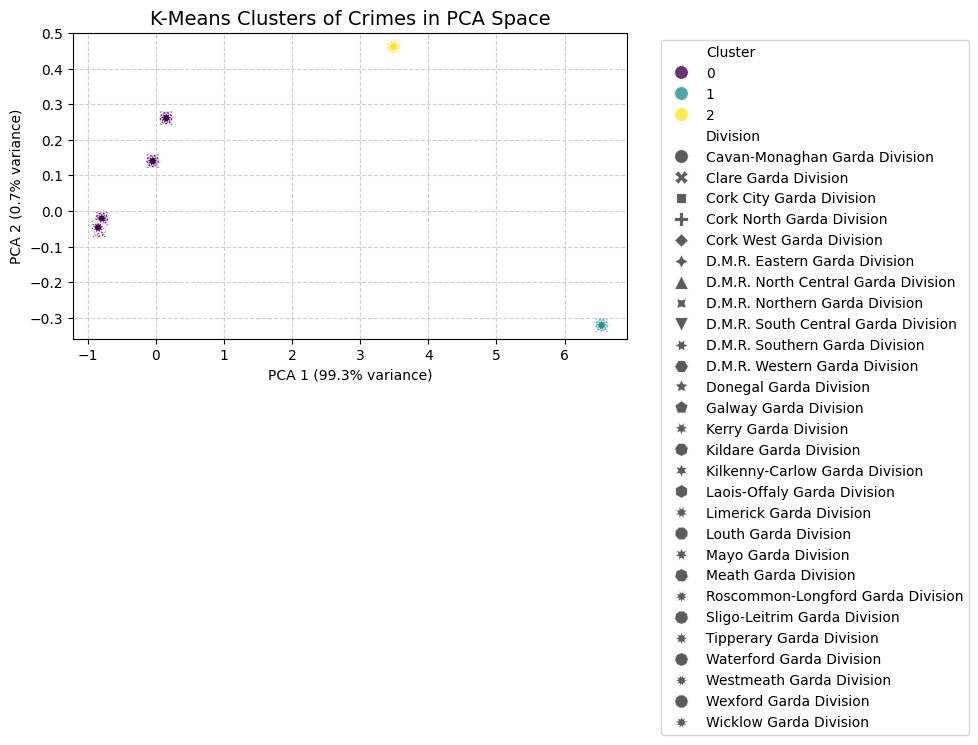

Total Explained Variance: 99.99%


In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import warnings

# Optional: Prevents common KMeans memory leak warnings on Windows
warnings.filterwarnings("ignore", category=UserWarning)

# --- Clustering Logic ---
# Selecting the seasonal features
X = df[["SPRING", "SUMMER", "AUTUMN", "WINTER"]].values

# Standardizing is crucial for KMeans so features contribute equally
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define and fit KMeans
k = 3  
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nDataFrame with cluster labels:")
print(df.head())

# --- PCA for Visualization ---
# Reduce 4D seasonal data to 2D for a scatter plot
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# Add PCA coordinates back to DataFrame
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# --- Visualization ---
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="PCA1",
    y="PCA2",
    hue="Cluster",
    palette="viridis", # Using a clearer color palette
    style="Division" if "Division" in df.columns else None, 
    s=100,
    alpha=0.8
)

plt.title("K-Means Clusters of Crimes in PCA Space", fontsize=14)
plt.xlabel(f"PCA 1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PCA 2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print(f"Total Explained Variance: {sum(pca.explained_variance_ratio_):.2%}")